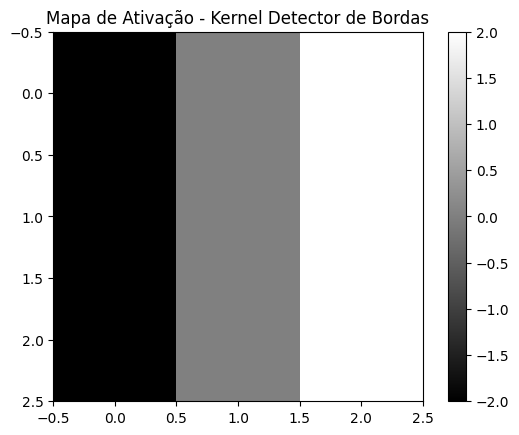

In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Imagem de entrada 5x5
image = torch.tensor([[0., 0., 1., 0., 0.],
                      [0., 1., 1., 1., 0.],
                      [1., 1., 1., 1., 1.],
                      [0., 1., 1., 1., 0.],
                      [0., 0., 1., 0., 0.]]).unsqueeze(0).unsqueeze(0)

# Kernel 3x3
kernel = torch.tensor([[1., 0., -1.],
                       [1., 0., -1.],
                       [1., 0., -1.]]).unsqueeze(0).unsqueeze(0)

# Convolução manual
conv = nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=0, bias=False)
conv.weight.data = kernel
output = conv(image)

plt.imshow(output.squeeze().detach(), cmap='gray')
plt.title('Mapa de Ativação - Kernel Detector de Bordas')
plt.colorbar()
plt.show()


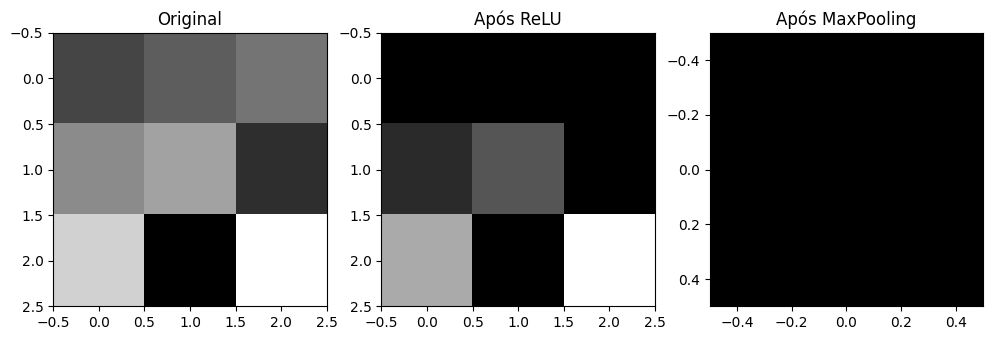

In [9]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Mapa de ativação simulado
activation = torch.tensor([[[[-2., -1., 0.],
                             [1., 2., -3.],
                             [4., -5., 6.]]]])

# ReLU
relu = nn.ReLU()
relu_out = relu(activation)

# MaxPooling
pool = nn.MaxPool2d(kernel_size=2)
pooled_out = pool(relu_out)

# Visualização
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(activation.squeeze(), cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(relu_out.squeeze(), cmap='gray')
axs[1].set_title('Após ReLU')

# Handle the case where pooled_out is a single value
if pooled_out.numel() == 1:
    axs[2].imshow(pooled_out.squeeze().detach().numpy().reshape((1, 1)), cmap='gray')
else:
    axs[2].imshow(pooled_out.squeeze().detach().numpy(), cmap='gray')

axs[2].set_title('Após MaxPooling')
plt.show()

In [10]:
import torch
import torch.nn as nn

# Entrada com 2 canais
input_tensor = torch.randn(1, 2, 5, 5)

# Convolução: 2 canais de entrada, 3 canais de saída
conv = nn.Conv2d(in_channels=2, out_channels=3, kernel_size=3, padding=1)
output = conv(input_tensor)

print("Forma da saída:", output.shape)  # Esperado: [1, 3, 5, 5]


Forma da saída: torch.Size([1, 3, 5, 5])


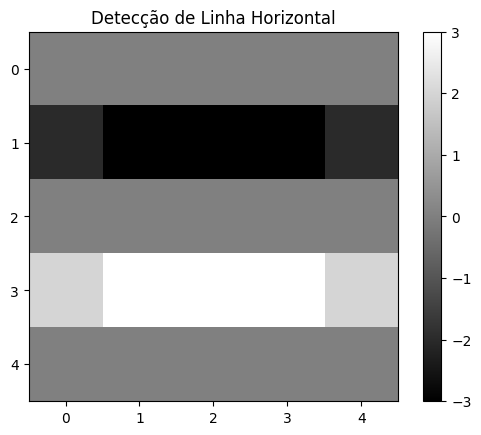

In [11]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Imagem com linha horizontal
image = torch.zeros(1, 1, 5, 5)
image[0, 0, 2, :] = 1

# Kernel para detectar linha horizontal
kernel = torch.tensor([[1., 1., 1.],
                       [0., 0., 0.],
                       [-1., -1., -1.]]).unsqueeze(0).unsqueeze(0)

conv = nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False)
conv.weight.data = kernel
output = conv(image)

plt.imshow(output.squeeze().detach(), cmap='gray')
plt.title('Detecção de Linha Horizontal')
plt.colorbar()
plt.show()
